# Data Analysis for Sign Language project
Autors: Karen and Oren

In [ ]:
import os
import json
import cv2
import pandas as pd
import matplotlib.pyplot as plt


### 1.1 Data Stats

In [25]:
data_info = "data/WLASL_v0.3.json"
with open("data/missing.txt", 'r') as file:
    missing = [int(line.strip()) for line in file]

def countMissing(fileName):
    f = open(fileName)
    data = json.load(f)
    lst_missing = {}
    lst_present = {}

    # Count the missing and present videos are each word
    for i in data:
        name = i["gloss"]
        present = 0
        absent = 0
        for j in i["instances"]:
            if int(j["video_id"]) in missing:
                absent = absent + 1
            else:
                present = present + 1
        lst_missing[name] = absent
        lst_present[name] = present

    # Count number of words
    print(f"Number of unique words in a data: {len(lst_present)}")

    # Total number of instances without removal of data
    print(f"Total number of instance: {sum(lst_present.values()) + sum(lst_missing.values())}")
    print(f"Average number of instance per word: {(sum(lst_present.values()) + sum(lst_missing.values())) / len(lst_present)}")
    summed_dict = {}
    for key in lst_present.keys():
        summed_dict[key] = lst_present[key] + lst_missing[key]
    print(f"Minimum number of instance per word: {summed_dict[min(summed_dict, key=summed_dict.get)]}")
    print(f"Maximum number of instance per word: {summed_dict[max(summed_dict, key=summed_dict.get)]}")

    # Total number of instances with removal of data
    print(f"Total number of instance after removal: {sum(lst_present.values())}")
    print(f"Average number of instance per word after removal: {sum(lst_present.values()) / len(lst_present)}")
    print(f"Average number of instance per word removed: {sum(lst_missing.values()) / len(lst_present)}")
    print(f"Minimum number of instance per word after removal: {lst_present[min(lst_present, key=lst_present.get)]}")
    print(f"Maximum number of instance per word after removal: {lst_present[max(lst_present, key=lst_present.get)]}")
    print(f"Minimum number of instance per word removed: {lst_missing[min(lst_missing, key=lst_missing.get)]}")
    print(f"Maximum number of instance per word removed: {lst_missing[max(lst_missing, key=lst_missing.get)]}")


countMissing(data_info)

Number of unique words in a data: 2000
Total number of instance: 21083
Average number of instance per word: 10.5415
Minimum number of instance per word: 6
Maximum number of instance per word: 40
Total number of instance after removal: 11980
Average number of instance per word after removal: 5.99
Average number of instance per word removed: 4.5515
Minimum number of instance per word after removal: 2
Maximum number of instance per word after removal: 16
Minimum number of instance per word removed: 0
Maximum number of instance per word removed: 34


### 1.2 Find the lengths of videos and frame rates

In [3]:
stats = pd.DataFrame({'video_id': [], 'fps':[],'width':[],'height':[], 'duration':[]})
for i, file in enumerate(os.listdir('videos')):
    video_file = os.path.join('videos',file)
    video = cv2.VideoCapture(video_file)
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    if int(major_ver)  < 3 :
        length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
        print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else :
        length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = video.get(cv2.CAP_PROP_FPS)
    video_read = video.read()
    if video_read[0]:
        h, w, _ = video_read[1].shape
    stats.loc[i] = [file.replace('.mp4',''), fps, w, h, length/fps]
    video.release()


In [14]:
stats.shape

(21095, 5)

In [26]:
data_info = "data/WLASL_v0.3.json"

f = open(data_info)
data = json.load(f)
metadata = pd.DataFrame.from_dict(data)
f.close()

In [68]:
videos_in_dir = [f.name.split('.')[0] for f in os.scandir('videos')]
missing_new = [] # Update: after the dataset autour shared the missing videos, we suppose to have them all

columns = [
    'bbox',
    'fps',
    'frame_end',
    'frame_start',
    'instance_id',
    'signer_id',
    'source',
    'split',
    'url',
    'variation_id',
    'video_id',
    'word'
    ]
rearrange = pd.DataFrame(columns=columns)
for i, word in enumerate(data):
    for instance in word['instances']:
        if instance['video_id'] not in videos_in_dir:
            missing.append(instance['video_id'])
            continue
        rearrange.loc[instance['video_id']] = instance
rearrange['video_id'] = pd.to_numeric(rearrange['video_id'])
stats['video_id'] = pd.to_numeric(stats['video_id'])


In [69]:
rearrange

,bbox,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id,video_id,word
69241,"[385, 37, 885, 720]",25,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0,69241,book
65225,"[190, 25, 489, 370]",25,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0,65225,book
68011,"[262, 1, 652, 480]",25,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0,68011,book
68208,"[123, 19, 516, 358]",25,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0,68208,book
68012,"[95, 0, 1180, 720]",25,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0,68012,book
...,...,...,...,...,...,...,...,...,...,...,...,...
63186,"[76, 17, 236, 240]",25,-1,1,2,2,spreadthesign,train,https://media.spreadthesign.com/video/mp4/13/9...,0,63186,whistle
63187,"[3, 0, 320, 240]",25,-1,1,3,14,handspeak,train,https://www.handspeak.com/word/w/whistle.mp4,0,63187,whistle
63188,"[68, 14, 212, 192]",25,-1,1,4,11,signingsavvy,train,https://www.signingsavvy.com/signs/mp4/9/9961.mp4,0,63188,whistle
63189,"[18, 4, 228, 240]",25,-1,1,5,84,aslpro,train,http://www.aslpro.com/main/w/whistle.swf,0,63189,whistle


In [70]:
backup_rearrange = rearrange.copy()
backup_stats = stats.copy()

In [71]:
rearrange = rearrange.merge(stats, on='video_id', how='left')
rearrange.to_csv('data/video_labels.csv')

OpenCV: Couldn't read video stream from file "videos/7085.mp4"
[ERROR:0@862.909] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/runner/miniforge3/conda-bld/libopencv_1675730057878/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'


OpenCV: Couldn't read video stream from file "videos/7086.mp4"
[ERROR:0@862.910] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/runner/miniforge3/conda-bld/libopencv_1675730057878/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'


OpenCV: Couldn't read video stream from file "videos/7087.mp4"
[ERROR:0@862.912] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.7.0) /Users/runner/miniforge3/conda-bld/libopencv_1675730057878/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/fe

(256, 256, 3)


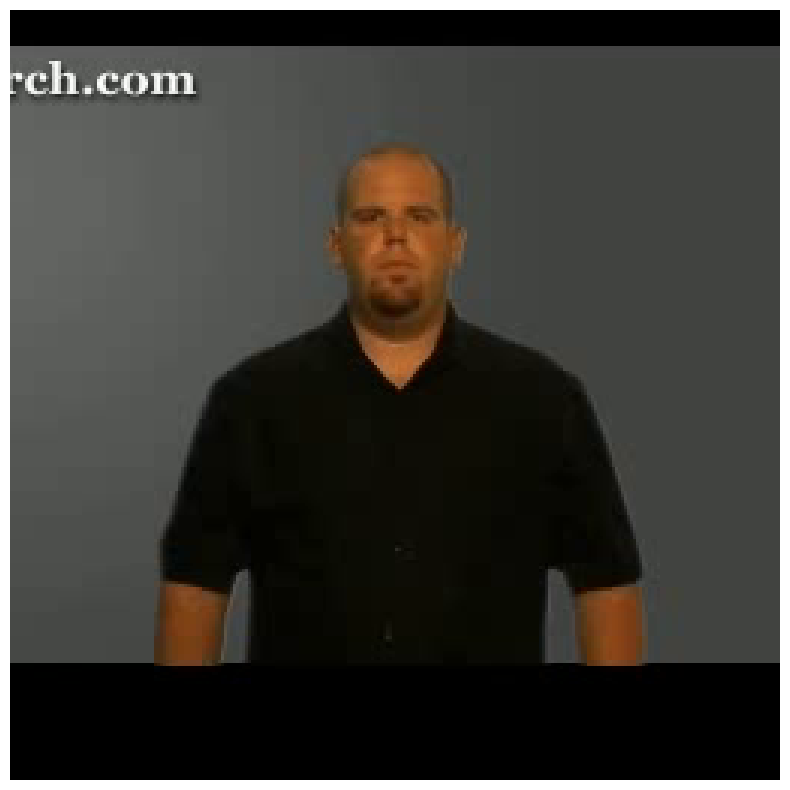

In [24]:
# The following is just garbage code, can't remember what it is for
for row in rearrange.iterrows():
    video_id = row[1].video_id
    video_file = os.path.join('videos',str(video_id)+'.mp4')
    video = cv2.VideoCapture(video_file)
    video_read = video.read()
    frame = video_read[1]
    video.release()

## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")
    plt.plot()

img = frame.copy()
bbox = [385, 37, 885, 720]
pt2 = [385,37]
pt1 = [885,720]
cv2.rectangle(img, pt1, pt2, (0, 0, 255), 3)
display_cv2_img(img)
print(img.shape)